WNS HR Analytics Competiton

Goal is to predict who will be promoted based on previous performance, performance in training of vertical until a checkpoint and demographics.

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [380]:
# read the data
train_data=pd.read_csv('train.csv')

In [337]:
#check some sample data
train_data.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [5]:
#data info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Looks like education and previous year rating has missing data !!

In [6]:
#Check Null values in columns
train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
# Inspect numeric columns for visible outliers
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Looks like there are no outliers as such !!

In [466]:
# check target distribution
train_data.is_promoted.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

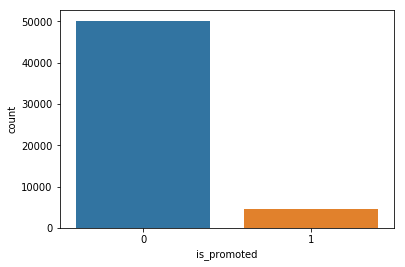

In [9]:
sns.countplot(x='is_promoted',data=train_data)
plt.show()

The target variable is highly imbalanced!!

#### EDA

###### 1. Gender

Let's check which gender is more likely to get promoted and whether there is any influence of gender on getting that coveted promotion!!

In [10]:
train_data.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

The number of males is more than twice th number of females.

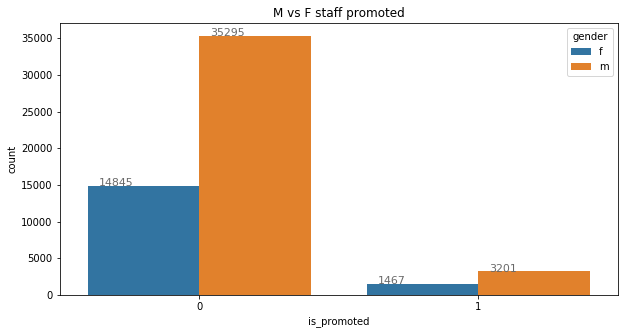

In [11]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='is_promoted',hue='gender',data=train_data)
# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey'
                )
plt.title('M vs F staff promoted')
plt.show()

It seems the M vs F promotions are in proportion to their counts. Approx 10 %  men of total men and 10% women of total women got promoted !!

###### 2. Department

Are people of specific department preferred for promotions ?

In [12]:
# Check people count in different departments
train_data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

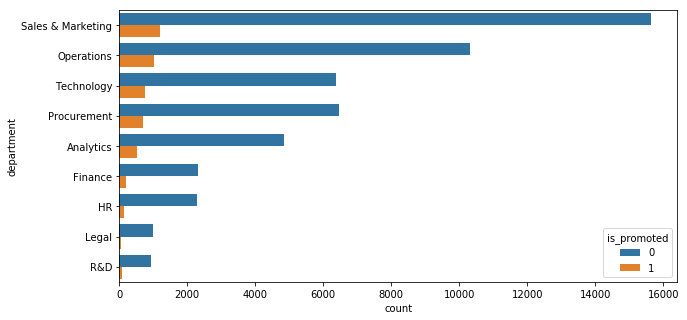

In [13]:
# count by promoted
plt.figure(figsize=(10,5))
sns.countplot(y='department',data=train_data,hue='is_promoted',order=train_data['department'].value_counts().index)
plt.show()

C:\Users\Gaurav\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x360 with 0 Axes>

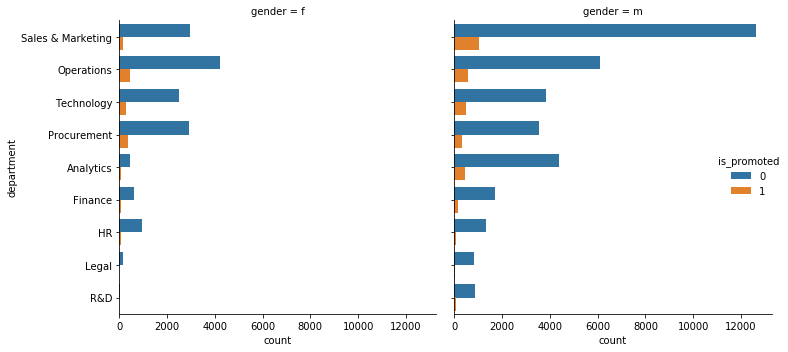

In [14]:
# facet by M vs F
plt.figure(figsize=(10,5))
sns.factorplot(y='department',data=train_data,hue='is_promoted',col='gender',kind='count',order=train_data['department'].value_counts().index)
plt.tight_layout()
plt.show()

* No female from Analytics, Finance and HR dept is being prmoted.
* Very few (almost none!!) from Legal and R&D dept are getting promoted

###### 3. Previous year rating

This could be one of the most important factor deciding on the promotions of people. Let's check this one out!!

In [15]:
train_data.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

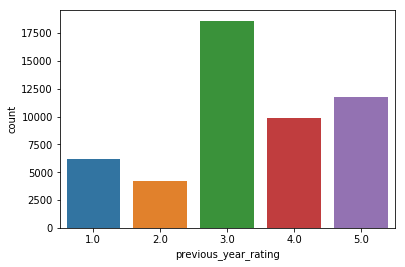

In [16]:
sns.countplot(x='previous_year_rating',data=train_data)
plt.show()

Looks like most participants got a rating of 3 in previous year.

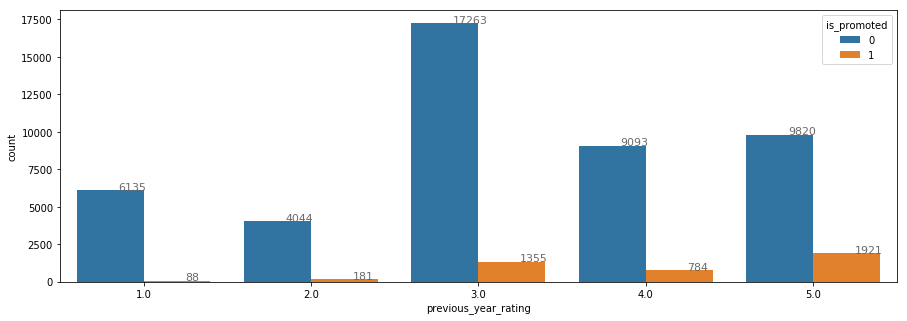

In [17]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='previous_year_rating',hue='is_promoted',data=train_data)
for i in ax.patches:
    ax.text(i.get_x()+0.25,i.get_height(),str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
plt.show()

In [18]:
# Check percentage of promoted vs non promoted for previous years rating
pd.crosstab(train_data['previous_year_rating'],train_data['is_promoted']).apply(lambda x: round(x/x.sum(),4)*100,axis=1)

is_promoted,0,1
previous_year_rating,,
1.0,98.59,1.41
2.0,95.72,4.28
3.0,92.72,7.28
4.0,92.06,7.94
5.0,83.64,16.36


We can see that approx. 16 % of those who received rating 5 last year got promoted. This is more than double for any other rating. Thus , being a top performer previous year helps in getting that desired promotion !

C:\Users\Gaurav\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x360 with 0 Axes>

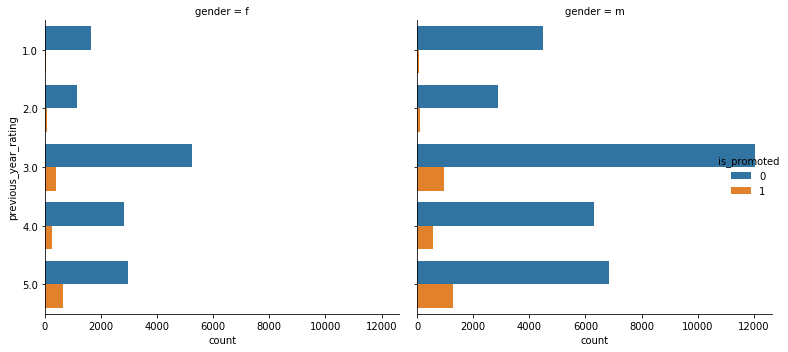

In [19]:
# Facet by Gender and Dept
plt.figure(figsize=(10,5))
sns.factorplot(y='previous_year_rating',data=train_data,hue='is_promoted',col='gender',kind='count')
plt.tight_layout()
plt.show()

In [20]:
# Check percentage of promoted vs non promoted for previous years rating
pd.crosstab([train_data['department'],train_data['previous_year_rating']],[train_data['gender'],train_data['is_promoted']]).apply(lambda x: round(x/x.sum(),4)*100,axis=1)

gender                                      f              m       
is_promoted                                 0      1       0      1
department        previous_year_rating                             
Analytics         1.0                    9.20   0.75   88.06   1.99
                  2.0                    8.01   0.35   85.02   6.62
                  3.0                    8.32   0.83   83.80   7.04
                  4.0                    7.70   1.03   85.32   5.95
                  5.0                    7.32   1.83   76.69  14.15
Finance           1.0                   22.94   0.59   74.12   2.35
                  2.0                   23.39   2.42   68.55   5.65
                  3.0                   25.87   1.42   67.69   5.02
                  4.0                   24.32   2.08   70.89   2.70
                  5.0                   23.13   3.56   61.74  11.57
HR                1.0                   36.21   0.00   63.79   0.00
                  2.0                   40.85   1.83   56.71   0.61
                  3.0                   38.53   2.14   56.84   2.50
                  4.0                   39.76   1.88   55.76   2.59
                  5.0                   40.49   4.23   48.94   6.34
Legal             1.0                   12.22   0.00   86.67   1.11
                  2.0                    3.33   1.67   90.00   5.00
                  3.0                   15.41   0.58   81.69   2.33
                  4.0                   15.53   0.00   81.37   3.11
                  5.0                   12.04   0.93   77.78   9.26
Operations        1.0                   36.75   0.71   61.25   1.28
                  2.0                   37.43   3.44   56.89   2.25
                  3.0                   36.83   3.47   54.47   5.22
                  4.0                   39.67   2.46   54.76   3.11
                  5.0                   36.84   6.54   48.37   8.26
Procurement       1.0                   42.18   0.44   56.19   1.18
                  2.0                   40.79   3.96   53.87   1.38
                  3.0                   40.13   4.02   52.90   2.95
                  4.0                   45.05   3.61   47.82   3.52
                  5.0                   37.16  13.45   39.27  10.11
R&D               1.0                    2.70   0.00   97.30   0.00
                  2.0                    0.00   0.00  100.00   0.00
                  3.0                    5.71   0.86   89.14   4.29
                  4.0                    6.25   0.00   87.50   6.25
                  5.0                    4.89   0.75   83.83  10.53
Sales & Marketing 1.0                   20.22   0.13   78.91   0.74
                  2.0                   17.29   0.24   80.22   2.25
                  3.0                   18.33   0.87   74.42   6.38
                  4.0                   15.30   1.80   73.40   9.49
                  5.0                   16.33   1.92   71.29  10.46
Technology        1.0                   37.40   1.19   60.33   1.08
                  2.0                   39.88   1.85   55.02   3.25
                  3.0                   36.69   2.37   56.07   4.88
                  4.0                   34.21   4.09   55.59   6.11
                  5.0                   26.38  11.32   41.74  20.56

* If you are a member of Technology (M or F) with previous year's rating as 5, you have more than double the chance of getting promoted than anyone else in other departments
* 20% Males with previous rating 5 in  Technology department have got promoted. More than anyone else.

###### 4. KPI met >80 %

Meeting KPI's should be an important factor in getting promoted. Let's check!!

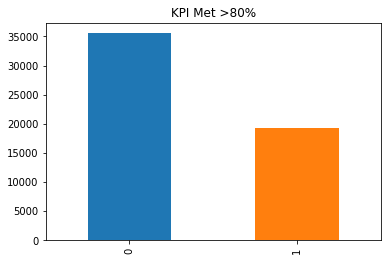

In [21]:
train_data['KPIs_met >80%'].value_counts().plot.bar(title='KPI Met >80%')

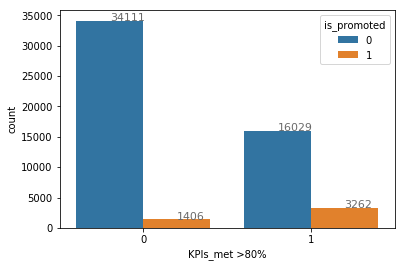

In [22]:
ax=sns.countplot(x='KPIs_met >80%',hue='is_promoted',data=train_data)
for i in ax.patches:
    ax.text(i.get_x()+0.2,i.get_height(),str(round((i.get_height()), 2)), fontsize=11, color='dimgrey')
plt.show()

In [23]:
print(pd.crosstab(train_data['KPIs_met >80%'],[train_data['gender'],train_data['is_promoted']]))
print('---------------------------------------------------------------------------------------')
pd.crosstab(train_data['KPIs_met >80%'],[train_data['gender'],train_data['is_promoted']]).apply(lambda x: round(x/x.sum()*100,2),axis=1)

gender            f            m      
is_promoted       0     1      0     1
KPIs_met >80%                         
0              9692   431  24419   975
1              5153  1036  10876  2226
---------------------------------------------------------------------------------------


gender             f            m       
is_promoted        0     1      0      1
KPIs_met >80%                           
0              27.29  1.21  68.75   2.75
1              26.71  5.37  56.38  11.54

As expected,people who meet kPI's > 80% have more chance of getting promoted.

###### 5. Avg Training Score

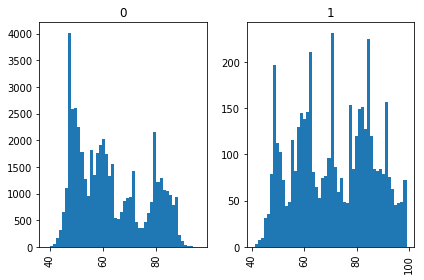

In [35]:
# Distribution
train_data.hist('avg_training_score',by='is_promoted',bins=50)
plt.tight_layout()
plt.show()

In [38]:
# Some summary stats for Avg training scores
print('Mean of avg training scores for promoted vs non promoted')
print(train_data[['is_promoted','avg_training_score']].groupby('is_promoted').mean())
print('--------------------------------------------------------------')
print('Median of avg training scores for promoted vs non promoted')
print(train_data[['is_promoted','avg_training_score']].groupby('is_promoted').median())
print('--------------------------------------------------------------')
print('Std Dev of avg training scores for promoted vs non promoted')
print(train_data[['is_promoted','avg_training_score']].groupby('is_promoted').std())

Mean of avg training scores for promoted vs non promoted
             avg_training_score
is_promoted                    
0                     62.647686
1                     71.325193
--------------------------------------------------------------
Median of avg training scores for promoted vs non promoted
             avg_training_score
is_promoted                    
0                            60
1                            71
--------------------------------------------------------------
Std Dev of avg training scores for promoted vs non promoted
             avg_training_score
is_promoted                    
0                     12.991969
1                     14.746122


###### 7. Recruitment Channel

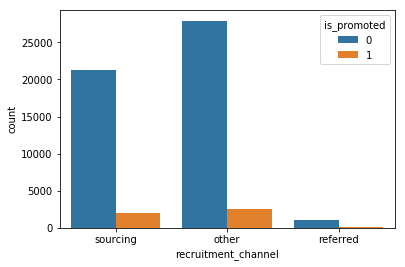

In [40]:
sns.countplot(x='recruitment_channel',data=train_data,hue='is_promoted')
plt.show()

<Figure size 864x360 with 0 Axes>

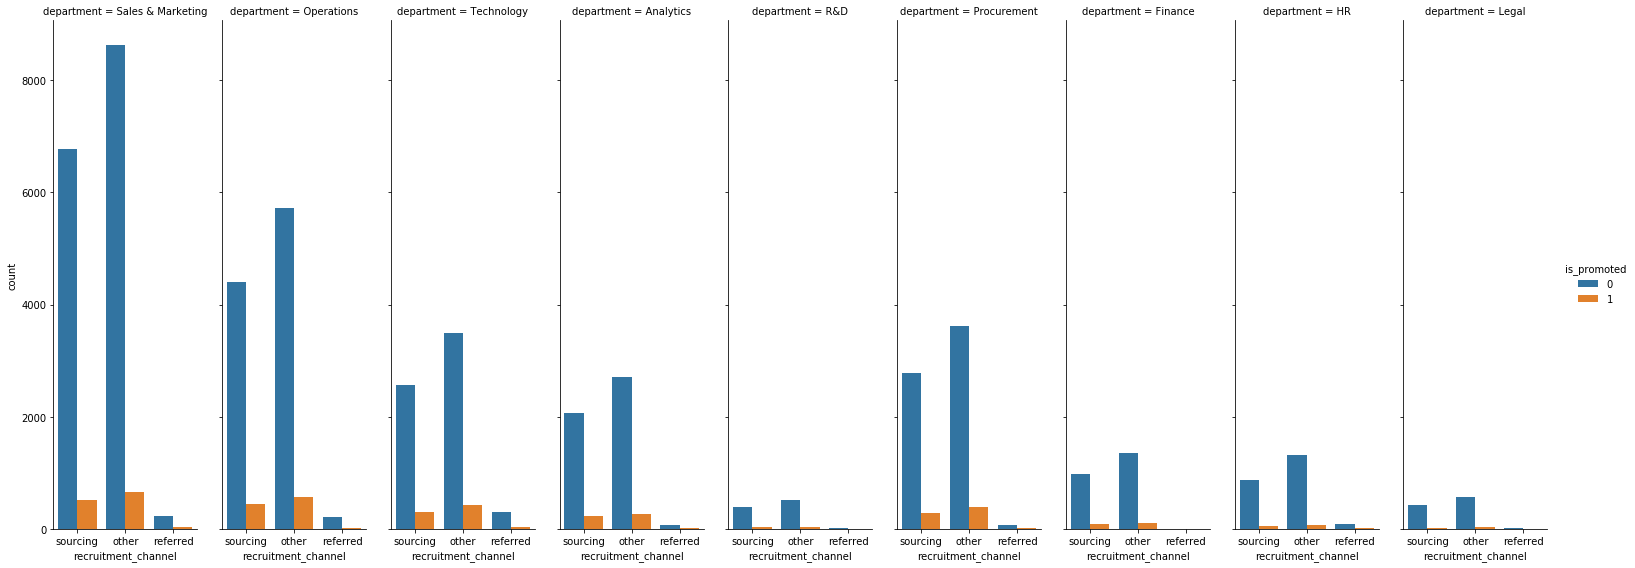

In [51]:
plt.figure(figsize=(12,5))
sns.catplot(x='recruitment_channel',data=train_data,hue='is_promoted',col='department',kind='count',height=8,aspect=0.3)
plt.show()

###### 8.region

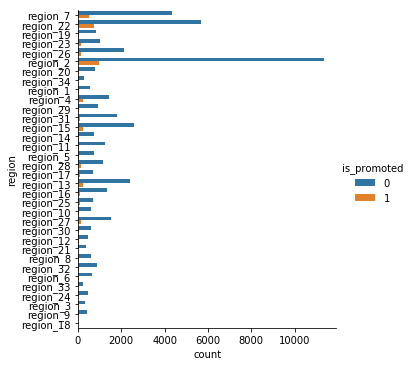

In [53]:
sns.catplot(y='region',data=train_data,hue='is_promoted',kind='count')
plt.show()

###### 9. No of trainings

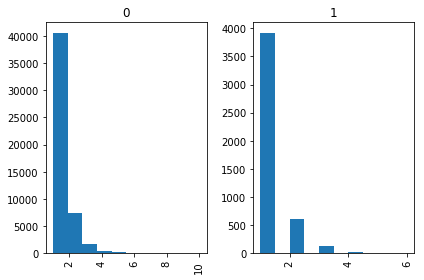

In [55]:
# Distribution
train_data.hist('no_of_trainings',by='is_promoted')
plt.tight_layout()
plt.show()

In [57]:
# Some summary stats for no_of_trainings
print('Mean of no_of_trainings for promoted vs non promoted')
print(train_data[['is_promoted','no_of_trainings']].groupby('is_promoted').mean())
print('--------------------------------------------------------------')
print('Median of no_of_trainings for promoted vs non promoted')
print(train_data[['is_promoted','no_of_trainings']].groupby('is_promoted').median())
print('--------------------------------------------------------------')
print('Std Dev of no_of_trainings for promoted vs non promoted')
print(train_data[['is_promoted','no_of_trainings']].groupby('is_promoted').std())

Mean of no_of_trainings for promoted vs non promoted
             no_of_trainings
is_promoted                 
0                   1.257639
1                   1.203299
--------------------------------------------------------------
Median of no_of_trainings for promoted vs non promoted
             no_of_trainings
is_promoted                 
0                          1
1                          1
--------------------------------------------------------------
Std Dev of no_of_trainings for promoted vs non promoted
             no_of_trainings
is_promoted                 
0                   0.617201
1                   0.513805


###### 10. Length of service

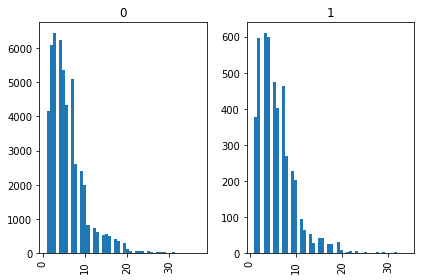

In [59]:
# Distribution
train_data.hist('length_of_service',by='is_promoted',bins=50)
plt.tight_layout()
plt.show()

In [60]:
# Some summary stats for length_of_service
print('Mean of length_of_service for promoted vs non promoted')
print(train_data[['is_promoted','length_of_service']].groupby('is_promoted').mean())
print('--------------------------------------------------------------')
print('Median of length_of_service for promoted vs non promoted')
print(train_data[['is_promoted','length_of_service']].groupby('is_promoted').median())
print('--------------------------------------------------------------')
print('Std Dev of length_of_service for promoted vs non promoted')
print(train_data[['is_promoted','length_of_service']].groupby('is_promoted').std())

Mean of length_of_service for promoted vs non promoted
             length_of_service
is_promoted                   
0                     5.879398
1                     5.716367
--------------------------------------------------------------
Median of length_of_service for promoted vs non promoted
             length_of_service
is_promoted                   
0                            5
1                            5
--------------------------------------------------------------
Std Dev of length_of_service for promoted vs non promoted
             length_of_service
is_promoted                   
0                     4.288039
1                     4.007772


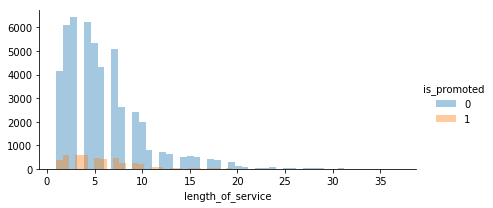

In [70]:
sns.FacetGrid(train_data,hue='is_promoted',aspect=2).map(sns.distplot,'length_of_service',kde=False).add_legend()
plt.show()

Very few persons with more than 10 years of service have been promoted.

###### 11. Age

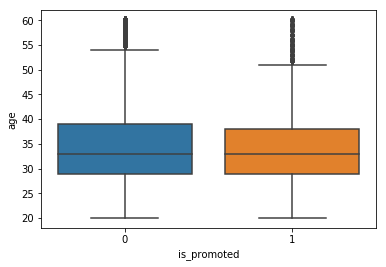

In [72]:
sns.boxplot(x='is_promoted',y='age',data=train_data)
plt.show()

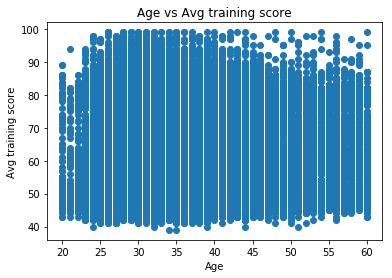

In [75]:
plt.scatter(x='age',y='avg_training_score',data=train_data)
plt.title('Age vs Avg training score')
plt.xlabel('Age')
plt.ylabel('Avg training score')
plt.show()

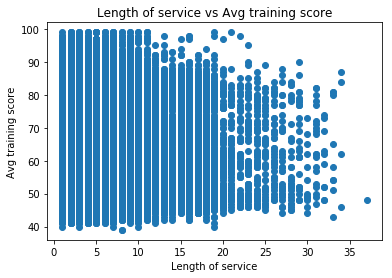

In [76]:
plt.scatter(x='length_of_service',y='avg_training_score',data=train_data)
plt.title('Length of service vs Avg training score')
plt.xlabel('Length of service')
plt.ylabel('Avg training score')
plt.show()

###### 12. awards_won?

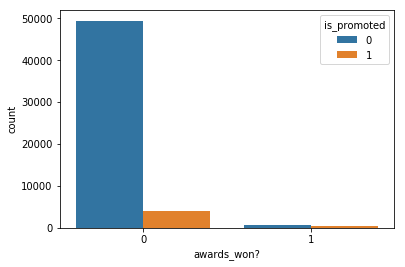

In [77]:
sns.countplot(x='awards_won?',data=train_data,hue='is_promoted')
plt.show()

#### Model Building

In [381]:
# Fill missing values in education and previous_year_rating
train_data['education']=train_data['education'].fillna(train_data.groupby('department')['education'].transform(lambda x: x.value_counts().idxmax()))
train_data['previous_year_rating']=train_data['previous_year_rating'].fillna(train_data.groupby('department')['previous_year_rating'].transform(lambda x: x.value_counts().idxmax()))

In [382]:
train_data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [7]:
le = LabelEncoder()

In [8]:
## Convert Features with many levels into numeric labels

le.fit(list(train_data.region.unique()))
train_data['region']=le.transform(train_data['region'])
print(train_data['region'].head())

0    31
1    14
2    10
3    15
4    18
Name: region, dtype: int32


In [395]:
train_data=pd.get_dummies(train_data,drop_first=True)

In [396]:
train_data.head(10)

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,carrier_level_Mid_level,carrier_level_Senior,age_bucket_Over_40,age_bucket_young,score_bucket_Low,score_bucket_Medium
0,65438,7,1,35,5.0,8,1,0,49,0,...,1,0,0,1,1,0,0,0,1,0
1,65141,22,1,30,5.0,4,0,0,60,0,...,0,1,0,0,0,0,0,1,0,1
2,7513,19,1,34,3.0,7,0,0,50,0,...,0,1,0,1,1,0,0,0,1,0
3,2542,23,2,39,1.0,10,0,0,50,0,...,0,1,0,0,1,0,0,0,1,0
4,48945,26,1,45,3.0,2,0,0,73,0,...,0,1,0,0,0,0,1,0,0,1
5,58896,2,2,31,3.0,7,0,0,85,0,...,0,1,0,1,1,0,0,0,0,0
6,20379,20,1,31,3.0,5,0,0,59,0,...,0,0,0,0,0,0,0,0,0,1
7,16290,34,1,33,3.0,6,0,0,63,0,...,1,1,0,1,1,0,0,0,0,1
8,73202,20,1,28,4.0,5,0,0,83,0,...,0,1,0,0,0,0,0,1,0,0
9,28911,1,1,32,5.0,5,1,0,54,0,...,1,1,0,1,0,0,0,0,0,1


In [355]:
train_data.columns

Index(['employee_id', 'region', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'train_score_to_rating_ratio', 'train_score_to_age_ratio',
       'total_performance', 'joining_age', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above', 'gender_f', 'gender_m',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'carrier_level_Junior',
       'carrier_level_Mid_level', 'carrier_level_Senior', 'age_bucket_Mid_age',
       'age_bucket_Over_40', 'age_bucket_young', 'score_bucket_High',
       'score_bucket_Low', 'score_bucket_Medium'],
      dtype='object')

In [397]:
from sklearn.model_selection import train_test_split

In [531]:
X=train_data.drop(['employee_id','is_promoted'],axis=1)
y=train_data[['is_promoted']].values

In [488]:
X=train_data[main_feat] # fit only imp features from XGBOOST

In [489]:
 X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.40, random_state=42,stratify=y)

In [490]:
print(len(X_train),len(X_test))

32884 21924


In [539]:
len(X_train.columns)

31

###### Oversampling using SMOTE for imbalance data

In [157]:
from imblearn.over_sampling import SMOTE

In [548]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [549]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (60166, 32)
After OverSampling, the shape of train_y: (60166,) 

After OverSampling, counts of label '1': 30083
After OverSampling, counts of label '0': 30083


###### Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [159]:
## Create a Random Forest Regressor
## Lets use f1 score to find  best number of estimator
rf_reg = RandomForestClassifier(random_state=0,n_estimators=100,max_depth=20,max_features='sqrt',warm_start=False)
min_est=10
max_est=500
score_mean=[]
estimator=[]
score_std_upper=[]
score_std_lower=[]
for est in range(min_est,max_est+1,20):
    rf_reg.set_params(n_estimators=est)
    scores_rfr = cross_val_score(rf_reg,X_train_res,y_train_res,cv=5,scoring='f1')
    print('estimators:',est)
#     print('explained variance scores for k=10 fold validation:',scores_rfr)
    print("Est. f1 score: %f (+/- %f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
    print('')
    score_mean.append(scores_rfr.mean())
    score_std_upper.append(scores_rfr.mean()+scores_rfr.std()*2) # for error plotting
    score_std_lower.append(scores_rfr.mean()-scores_rfr.std()*2) # for error plotting
    estimator.append(est)
    

estimators: 10
Est. f1 score: 0.942062 (+/- 0.176498)

estimators: 30
Est. f1 score: 0.947754 (+/- 0.169784)

estimators: 50
Est. f1 score: 0.949227 (+/- 0.167730)

estimators: 70
Est. f1 score: 0.949247 (+/- 0.169638)

estimators: 90
Est. f1 score: 0.949526 (+/- 0.169453)

estimators: 110
Est. f1 score: 0.949550 (+/- 0.169350)

estimators: 130
Est. f1 score: 0.949641 (+/- 0.169103)

estimators: 150
Est. f1 score: 0.949810 (+/- 0.169238)

estimators: 170
Est. f1 score: 0.949902 (+/- 0.168623)

estimators: 190
Est. f1 score: 0.950032 (+/- 0.168474)

estimators: 210
Est. f1 score: 0.949947 (+/- 0.169130)

estimators: 230
Est. f1 score: 0.949687 (+/- 0.169426)

estimators: 250
Est. f1 score: 0.949910 (+/- 0.168907)

estimators: 270
Est. f1 score: 0.949984 (+/- 0.168982)

estimators: 290
Est. f1 score: 0.949860 (+/- 0.169473)

estimators: 310
Est. f1 score: 0.949767 (+/- 0.170030)

estimators: 330
Est. f1 score: 0.949662 (+/- 0.170760)

estimators: 350
Est. f1 score: 0.949780 (+/- 0.170229

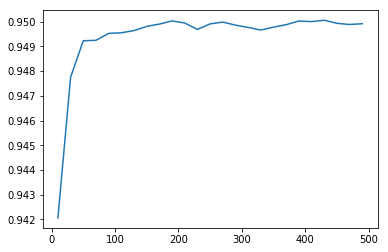

In [160]:
## Plot Estimators vs Explained Variance
plt.plot(estimator,score_mean)

In [270]:
rf_reg = RandomForestClassifier(random_state=0,n_estimators=100,max_depth=20,max_features='sqrt',warm_start=False)

In [271]:
# lets fit the model with the best estimator that we got !!
rf_reg.set_params(n_estimators=190)
rf_reg.fit(X_train,y_train)

C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [272]:
# Predict on our test data
predict_test=rf_reg.predict(X_test)

In [273]:
from sklearn.metrics import confusion_matrix

In [274]:
# Calc F1 score on test data
tn, fp, fn, tp = confusion_matrix(y_test, predict_test).ravel()
print("True Negative :"+str(tn))
print("False Positive :"+str(fp))
print("False Negative :"+str(fn))
print("True positive :"+str(tp))

True Negative :10032
False Positive :22
False Negative :615
True positive :293


In [275]:
f1_score(y_test,predict_test)

0.47914963205233035

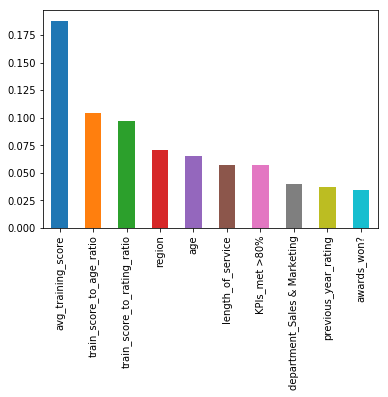

In [276]:
## Plot Feature Importance
## Plot Top 10 Features
feat_importances = pd.Series(rf_reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='bar')

###### XGBoost Model

In [19]:
import xgboost as xgb

In [20]:
## Try GridSearch to search for better parameters
from sklearn.model_selection import GridSearchCV   #Perforing grid search

param_test1 = {
 'max_depth':range(3,10,2),'n_estimators':range(50,210,50),
 'min_child_weight':range(1,6,2),'learning_rate':[x / 10.0 for x in range(1, 10, 1)]
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1',iid=False, cv=5)
gsearch1.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'max_depth': range(3, 10, 2), 'n_estimators': range(50, 210, 50), 'min_child_weight': range(1, 6, 2), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [21]:
gsearch1.best_params_

{'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 100}

In [22]:
gsearch1.best_score_

0.9497073089661594

###### Fit XGB with best parameters

In [23]:
bst_clf=xgb.XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=9,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=30)

In [25]:
bst_clf.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=9, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=30, silent=True,
       subsample=0.8)

In [40]:
X_test_matrix=np.matrix(X_test)

In [42]:
predict_test_xg=bst_clf.predict(X_test_matrix)

In [43]:
f1_score(y_test,predict_test_xg)

0.49193548387096775

We get slightly better F1 with XGBoost

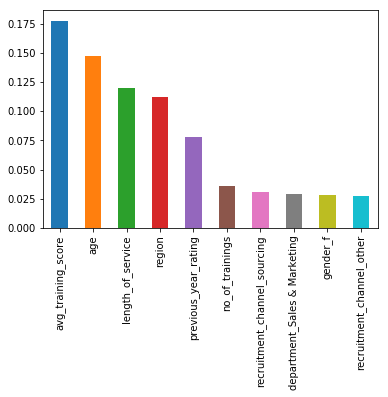

In [44]:
## Plot Feature Importance
## Plot Top 10 Features
feat_importances_xg = pd.Series(bst_clf.feature_importances_, index=X_train.columns)
feat_importances_xg.nlargest(10).plot(kind='bar')

###### Submission file

In [555]:
orig_test=pd.read_csv('test.csv')

In [556]:
orig_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [557]:
orig_test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [558]:
# Fill missing values in education and previous_year_rating
orig_test['education']=orig_test['education'].fillna(orig_test.groupby('department')['education'].transform(lambda x: x.value_counts().idxmax()))
orig_test['previous_year_rating']=orig_test['previous_year_rating'].fillna(orig_test.groupby('department')['previous_year_rating'].transform(lambda x: x.value_counts().idxmax()))

In [559]:
orig_test['region']=orig_test['region'].str.replace('region_','').astype('int')
orig_test['train_score_to_rating_ratio']=orig_test['avg_training_score']/orig_test['previous_year_rating']
orig_test['train_score_to_rating_ratio']=orig_test['train_score_to_rating_ratio'].fillna(orig_test.groupby('department')['train_score_to_rating_ratio'].transform('median'))
orig_test['train_score_to_age_ratio']=orig_test['avg_training_score']/orig_test['age']
orig_test['carrier_level']=orig_test['length_of_service'].apply(map_carrier)
orig_test['age_bucket']=orig_test['age'].apply(map_age)
orig_test['score_bucket']=orig_test['avg_training_score'].apply(map_score)
orig_test['total_performance']=orig_test['no_of_trainings']+orig_test['previous_year_rating']+orig_test['KPIs_met >80%']+orig_test['awards_won?']
orig_test['joining_age']=orig_test['age']-orig_test['length_of_service']

In [ ]:
orig_test['region']=le.transform(orig_test['region'])
print(orig_test['region'].head())

In [561]:
orig_test=pd.get_dummies(orig_test,drop_first=True)
orig_test.head()

,employee_id,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,train_score_to_rating_ratio,...,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,carrier_level_Mid_level,carrier_level_Senior,age_bucket_Over_40,age_bucket_young,score_bucket_Low,score_bucket_Medium
0,8724,26,1,24,3.0,1,1,0,77,25.666667,...,0,1,0,1,0,0,0,1,0,0
1,74430,4,1,31,3.0,5,0,0,51,17.000000,...,0,0,0,0,0,0,0,0,0,1
2,72255,13,1,31,1.0,4,0,0,47,47.000000,...,0,1,0,0,0,0,0,0,1,0
3,38562,2,3,31,2.0,9,0,0,65,32.500000,...,0,0,0,0,1,0,0,0,0,1
4,64486,29,1,30,4.0,7,0,0,61,15.250000,...,0,1,0,1,1,0,0,1,0,1


In [562]:
orig_test_n=orig_test.drop(['employee_id'],axis=1)

In [564]:
## Create the pca feature
orig_test_pca=pca.transform(orig_test_n)
names_test=list(orig_test_n.columns)
names_test.append('pca')
orig_test_new=pd.concat([orig_test_n,pd.Series(orig_test_pca.reshape(-1,))],axis=1,ignore_index=True)
orig_test_new.columns=names_test

In [565]:
len(orig_test_n.columns)

31

In [566]:
orig_test_new.columns

Index(['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'train_score_to_rating_ratio',
       'train_score_to_age_ratio', 'total_performance', 'joining_age',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Below Secondary', 'education_Master's & above', 'gender_m',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'carrier_level_Mid_level', 'carrier_level_Senior', 'age_bucket_Over_40',
       'age_bucket_young', 'score_bucket_Low', 'score_bucket_Medium', 'pca'],
      dtype='object')

In [328]:
X_train.columns

Index(['region', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'train_score_to_rating_ratio',
       'train_score_to_age_ratio', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above', 'gender_f', 'gender_m',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'carrier_level_Junior',
       'carrier_level_Mid_level', 'carrier_level_Senior', 'age_bucket_Mid_age',
       'age_bucket_Over_40', 'age_bucket_young', 'score_bucket_High',
       'score_bucket_Low', 'score_bucket_Medium'],
      dtype='object')

In [567]:
orig_test_matrix=np.matrix(orig_test_new)

In [568]:
predict_test_orig=bst_clf2.predict(orig_test_matrix)

In [569]:
xg_sub1=pd.DataFrame(predict_test_orig,columns=['is_promoted'])
xg_sub1['employee_id']=orig_test['employee_id']

In [570]:
xg_sub1=xg_sub1[['employee_id','is_promoted']]

In [571]:
xg_sub1.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [572]:
xg_sub1.to_csv("submission_xg_pca.csv", index=False)

In [72]:
# create second submission using RandomForest
# Predict on our test data
predict_test_rf=rf_reg.predict(orig_test_n)

In [73]:
rf_sub1=pd.DataFrame(predict_test_rf,columns=['is_promoted'])
rf_sub1['employee_id']=orig_test['employee_id']
rf_sub1=rf_sub1[['employee_id','is_promoted']]

In [74]:
rf_sub1.to_csv("submission_rf.csv", index=False)

###### Improving the models

Create new features

In [383]:
train_data['region']=train_data['region'].str.replace('region_','').astype('int')

In [384]:
train_data['train_score_to_rating_ratio']=train_data['avg_training_score']/train_data['previous_year_rating']

In [385]:
train_data['train_score_to_rating_ratio']=train_data['train_score_to_rating_ratio'].fillna(train_data.groupby('department')['train_score_to_rating_ratio'].transform('median'))

In [386]:
train_data['train_score_to_age_ratio']=train_data['avg_training_score']/train_data['age']

In [387]:
def map_carrier(x):
    if x<=5:
        return 'Junior'
    elif x>5 and x<=10:
        return 'Mid_level'
    else:
        return 'Senior'

In [388]:
train_data['carrier_level']=train_data['length_of_service'].apply(map_carrier)

In [389]:
def map_age(x):
    if x<=30:
        return 'young'
    elif x>30 and x<=40:
        return 'Mid_age'
    else:
        return 'Over_40'

In [390]:
train_data['age_bucket']=train_data['age'].apply(map_age)

In [391]:
def map_score(x):
    if x<=50:
        return 'Low'
    elif x>50 and x<=75:
        return 'Medium'
    else:
        return 'High'

In [392]:
train_data['score_bucket']=train_data['avg_training_score'].apply(map_score)

In [393]:
train_data['total_performance']=train_data['no_of_trainings']+train_data['previous_year_rating']+train_data['KPIs_met >80%']+train_data['awards_won?']

In [394]:
train_data['joining_age']=train_data['age']-train_data['length_of_service']

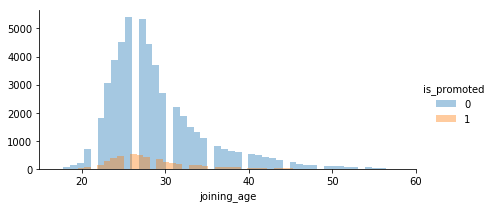

In [352]:
sns.FacetGrid(train_data,hue='is_promoted',aspect=2).map(sns.distplot,'joining_age',kde=False).add_legend()
plt.show()

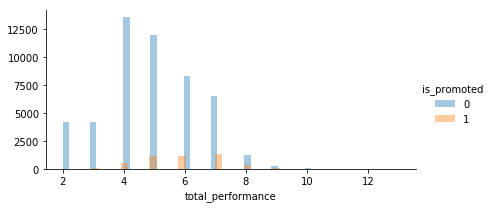

In [351]:
sns.FacetGrid(train_data,hue='is_promoted',aspect=2).map(sns.distplot,'total_performance',kde=False).add_legend()
plt.show()

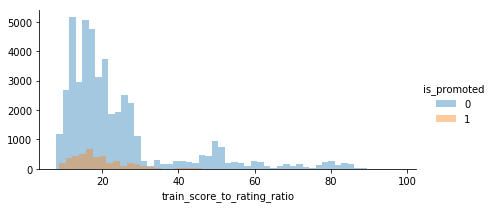

In [92]:
sns.FacetGrid(train_data,hue='is_promoted',aspect=2).map(sns.distplot,'train_score_to_rating_ratio',kde=False).add_legend()
plt.show()

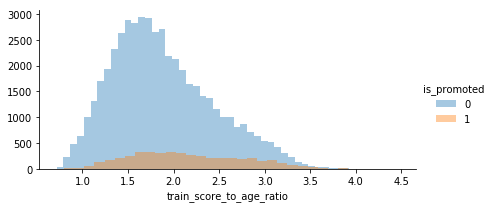

In [93]:
sns.FacetGrid(train_data,hue='is_promoted',aspect=2).map(sns.distplot,'train_score_to_age_ratio',kde=False).add_legend()
plt.show()

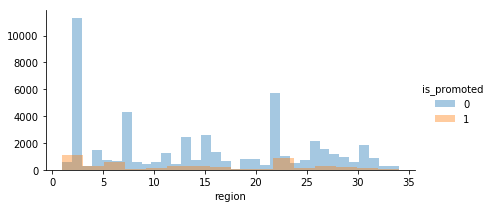

In [94]:
sns.FacetGrid(train_data,hue='is_promoted',aspect=2).map(sns.distplot,'region',kde=False).add_legend()
plt.show()

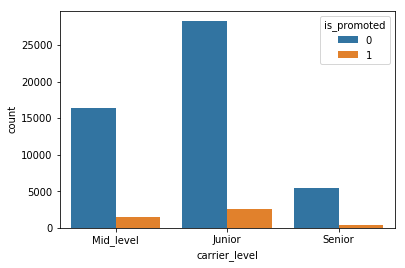

In [222]:
sns.countplot(x='carrier_level',data=train_data,hue='is_promoted')
plt.show()

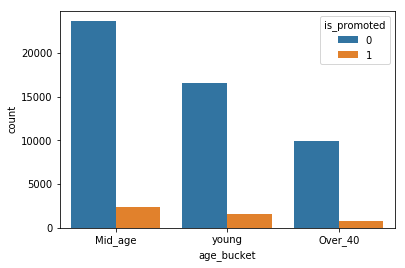

In [225]:
sns.countplot(x='age_bucket',data=train_data,hue='is_promoted')
plt.show()

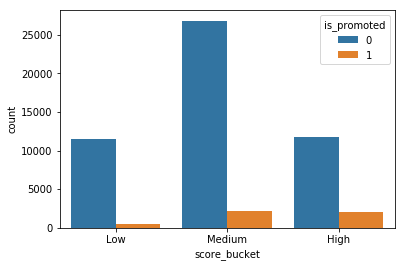

In [263]:
sns.countplot(x='score_bucket',data=train_data,hue='is_promoted')
plt.show()

In [118]:
train_data=train_data.drop(['avg_training_score','age','previous_year_rating'],axis=1)

###### Try PCA as a feature

In [532]:
from sklearn.decomposition import PCA

In [533]:
pca=PCA(n_components=1)

In [534]:
X_new=pca.fit_transform(X)

In [535]:
pca.explained_variance_ratio_

array([0.41519788])

In [536]:
names=list(X.columns)
names.append('pca')
names

['region',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'train_score_to_rating_ratio',
 'train_score_to_age_ratio',
 'total_performance',
 'joining_age',
 'department_Finance',
 'department_HR',
 'department_Legal',
 'department_Operations',
 'department_Procurement',
 'department_R&D',
 'department_Sales & Marketing',
 'department_Technology',
 'education_Below Secondary',
 "education_Master's & above",
 'gender_m',
 'recruitment_channel_referred',
 'recruitment_channel_sourcing',
 'carrier_level_Mid_level',
 'carrier_level_Senior',
 'age_bucket_Over_40',
 'age_bucket_young',
 'score_bucket_Low',
 'score_bucket_Medium',
 'pca']

In [537]:
X_pca=pd.concat([X,pd.Series(X_new.reshape(-1,))],ignore_index=True,axis=1)
X_pca.columns=names
X_pca.head()

,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,train_score_to_rating_ratio,train_score_to_age_ratio,...,gender_m,recruitment_channel_referred,recruitment_channel_sourcing,carrier_level_Mid_level,carrier_level_Senior,age_bucket_Over_40,age_bucket_young,score_bucket_Low,score_bucket_Medium,pca
0,7,1,35,5.0,8,1,0,49,9.800000,1.400000,...,0,0,1,1,0,0,0,1,0,-19.759392
1,22,1,30,5.0,4,0,0,60,12.000000,2.000000,...,1,0,0,0,0,0,1,0,1,-11.333616
2,19,1,34,3.0,7,0,0,50,16.666667,1.470588,...,1,0,1,1,0,0,0,1,0,-12.671778
3,23,2,39,1.0,10,0,0,50,50.000000,1.282051,...,1,0,0,1,0,0,0,1,0,15.732105
4,26,1,45,3.0,2,0,0,73,24.333333,1.622222,...,1,0,0,0,0,1,0,0,1,5.627051


In [547]:
 X_train, X_test, y_train, y_test = train_test_split(
 X_pca, y, test_size=0.40, random_state=42,stratify=y)

###### Fit XGboost with new features

In [372]:
## Try GridSearch to search for better parameters
from sklearn.model_selection import GridSearchCV   #Perforing grid search

param_test1 = {
 'max_depth':range(3,10,2),'n_estimators':range(100,500,50),
 'min_child_weight':range(1,6,2),'learning_rate':[x / 10.0 for x in range(1, 10, 1)]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1',iid=False, cv=5)
gsearch2.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'max_depth': range(3, 10, 2), 'n_estimators': range(100, 500, 50), 'min_child_weight': range(1, 6, 2), 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [373]:
gsearch2.best_params_

{'learning_rate': 0.1,
 'max_depth': 9,
 'min_child_weight': 3,
 'n_estimators': 100}

In [374]:
gsearch2.best_score_

0.9523091081939257

In [550]:
# fit xgboost using best parameters!!
bst_clf2=xgb.XGBClassifier( learning_rate =0.1, n_estimators=500, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.7, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=30)


In [404]:
from sklearn.model_selection import cross_val_score

In [495]:
cv_score=cross_val_score(bst_clf2,X_train_res,y_train_res,cv=10,scoring='f1')

In [496]:
np.mean(cv_score)

0.917597557079646

In [551]:
bst_clf2.fit(X_train_res,y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=30, silent=True,
       subsample=0.7)

In [552]:
X_test_matrix=np.matrix(X_test)
pred_test=bst_clf2.predict(X_test_matrix)

In [573]:
pred_test_prob=bst_clf2.predict_proba(X_test_matrix)

In [579]:
y_pred_new=[1 if x>=0.40 else 0 for x in pred_test_prob[:,1]]
f1_score(y_test,y_pred_new)

0.5120056497175142

In [553]:
f1_score(y_test,pred_test)

0.5089251804025827

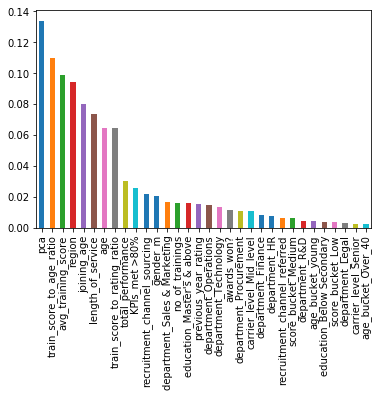

In [554]:
## Plot Feature Importance
## Plot Top 10 Features
feat_importances_xg = pd.Series(bst_clf2.feature_importances_, index=X_train.columns)
feat_importances_xg.nlargest(100).plot(kind='bar')

In [483]:
main_feat=list(feat_importances_xg.nlargest(15).index)

###### Logistic Regression Model

In [177]:
from sklearn.linear_model import LogisticRegression

In [198]:
log_clf=LogisticRegression(C=0.6,penalty='l1',max_iter=1000)

In [199]:
log_clf.fit(X_train_res,y_train_res)

LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [200]:
pred_log_test=log_clf.predict(X_test_matrix)

In [201]:
f1_score(y_test,pred_log_test)

0.37237237237237236